# Corona Virus Study 4 ; Spread in India and Rise modelled : Compare with EU



##  Import Libraries 

In [1]:
# import the necessary Core  libraries
import numpy as np 
import pandas as pd 
import os

In [2]:
# One time installs 
#!pip install pycountry
#!pip install pywaffle
#!pip install folium

In [3]:
# Import Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py

from pywaffle import Waffle

py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

##  Read Input files 



In [4]:
#Day by day data All countries 
#--------------------------------
# confirmed cases
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_conf1 = df_confirmed.copy()
# recovered 
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_recov1 = df_recovered.copy()
# deaths 
df_deaths    = pd.read_csv('time_series_covid19_deaths_global.csv')
df_deaths1 = df_deaths.copy()

## Pre Process Confirmed cases 

In [5]:
# Check data 
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [6]:
# Get column names 
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20'],
      dtype='object')

In [7]:
# Drop columns not needed for this Analysis  
df_confirmed.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

# Rename to shorter column names 
df_confirmed.rename(columns= {'Country/Region':'Region'},inplace= True)

In [8]:
# Check DF after drop and rename 
df_confirmed.columns

Index(['Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20'],
      dtype='object')

In [9]:
# Create Listof countries to Analyse
plot_countries = ['India','Iran','Italy','Korea, South','Spain']

# subset by countries to plot 
df_conf_plot= df_confirmed[df_confirmed.Region.isin(plot_countries)]

# Transpose df
df_conf_plot_T = df_conf_plot.T

# Check Actual Col Names 
df_conf_plot_T.head()

,131,133,137,143,201
Region,India,Iran,Italy,"Korea, South",Spain
1/22/20,0,0,0,1,0
1/23/20,0,0,0,1,0
1/24/20,0,0,0,2,0
1/25/20,0,0,0,2,0


In [10]:
# Rename Columns 
df_conf_plot_T.rename(columns= {131:'India',137:'Italy',133:'Iran',143:'Korea, South',201:'Spain'},inplace= True)

# drop first row 
df_conf_plot_T.drop(df_conf_plot_T.index[0],inplace=True)

# name Index 
df_conf_plot_T.index.name='DATE'

# Check 
df_conf_plot_T.head()

,India,Iran,Italy,"Korea, South",Spain
DATE,,,,,
1/22/20,0,0,0,1,0
1/23/20,0,0,0,1,0
1/24/20,0,0,0,2,0
1/25/20,0,0,0,2,0
1/26/20,0,0,0,3,0


## Pre process ; Recovered file 

In [11]:
# Check data 
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12,12,12,12,32,32,32,65,65,24
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Get column names 
df_recovered.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020', '2/1/2020',
       '2/2/2020', '2/3/2020', '2/4/2020', '2/5/2020', '2/6/2020', '2/7/2020',
       '2/8/2020', '2/9/2020', '2/10/2020', '2/11/2020', '2/12/2020',
       '2/13/2020', '2/14/2020', '2/15/2020', '2/16/2020', '2/17/2020',
       '2/18/2020', '2/19/2020', '2/20/2020', '2/21/2020', '2/22/2020',
       '2/23/2020', '2/24/2020', '2/25/2020', '2/26/2020', '2/27/2020',
       '2/28/2020', '2/29/2020', '3/1/2020', '3/2/2020', '3/3/2020',
       '3/4/2020', '3/5/2020', '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020',
       '3/10/2020', '3/11/2020', '3/12/2020', '3/13/2020', '3/14/2020',
       '3/15/2020', '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020',
       '3/20/2020', '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020'],
      dtype='object')

In [13]:
# Drop columns not needed for this Analysis  
df_recovered.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

# Rename to shorter column names 
df_recovered.rename(columns= {'Country/Region':'Region'},inplace= True)


In [14]:
# Check DF after drop and rename 
df_confirmed.columns

Index(['Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20'],
      dtype='object')

In [15]:
# subset by countries to plot 
df_recov_plot= df_recovered[df_recovered.Region.isin(plot_countries)]

# Transpose df
df_recov_plot_T = df_recov_plot.T

# Check Actual Col Names 
df_recov_plot_T.head()

,125,127,131,137,199
Region,India,Iran,Italy,"Korea, South",Spain
1/22/2020,0,0,0,0,0
1/23/2020,0,0,0,0,0
1/24/2020,0,0,0,0,0
1/25/2020,0,0,0,0,0


In [16]:
# Rename Columns 
#df_recov_plot_T.rename(columns= {125:'India',131:'Italy',127:'Iran',137:'Korea, South',199:'Spain'},inplace= True)

# drop first row 
#df_recov_plot_T.drop(df_conf_plot_T.index[0],inplace=True)

# name Index 
#df_recov_plot_T.index.name='DATE'

# Check 
df_recov_plot_T.head()

,125,127,131,137,199
Region,India,Iran,Italy,"Korea, South",Spain
1/22/2020,0,0,0,0,0
1/23/2020,0,0,0,0,0
1/24/2020,0,0,0,0,0
1/25/2020,0,0,0,0,0


In [17]:
df_temp  = df_recov_plot_T.iloc[1:]
del(df_recov_plot_T)
df_recov_plot_T = df_temp.copy()
df_recov_plot_T.head()

,125,127,131,137,199
1/22/2020,0,0,0,0,0
1/23/2020,0,0,0,0,0
1/24/2020,0,0,0,0,0
1/25/2020,0,0,0,0,0
1/26/2020,0,0,0,0,0


## Pre process : fatality 

In [18]:
# Check data 
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,2,2,2,2,2,4,5,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,7,9,11,15,17,17,19,21
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Get column names 
df_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20'],
      dtype='object')

In [20]:
# Drop columns not needed for this Analysis  
df_deaths.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

# Rename to shorter column names 
df_deaths.rename(columns= {'Country/Region':'Region'},inplace= True)

In [21]:
# Check DF after drop and rename 
df_deaths.columns

Index(['Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20'],
      dtype='object')

In [22]:
# subset by countries to plot 
df_deaths_plot= df_deaths[df_deaths.Region.isin(plot_countries)]

# Transpose df
df_deaths_plot_T = df_deaths_plot.T

# Check Actual Col Names 
df_deaths_plot_T.head()

,131,133,137,143,201
Region,India,Iran,Italy,"Korea, South",Spain
1/22/20,0,0,0,0,0
1/23/20,0,0,0,0,0
1/24/20,0,0,0,0,0
1/25/20,0,0,0,0,0


In [23]:
# Rename Columns 
df_deaths_plot_T.rename(columns= {131:'India',137:'Italy',133:'Iran',143:'Korea, South',201:'Spain'},inplace= True)

# drop first row 
df_deaths_plot_T.drop(df_deaths_plot_T.index[0],inplace=True)

# name Index 
df_deaths_plot_T.index.name='DATE'

# Check 
df_deaths_plot_T.head()

,India,Iran,Italy,"Korea, South",Spain
DATE,,,,,
1/22/20,0,0,0,0,0
1/23/20,0,0,0,0,0
1/24/20,0,0,0,0,0
1/25/20,0,0,0,0,0
1/26/20,0,0,0,0,0


##  Compare Spreads Across Countries 


In [24]:
# copy DFs for plot
df_confirmed_All = df_conf_plot_T.copy()
df_recovered_All = df_recov_plot_T.copy()
df_deaths_All    = df_deaths_plot_T.copy()

In [25]:
XDate = df_confirmed_All.index
XDate_recov = df_recovered_All.index

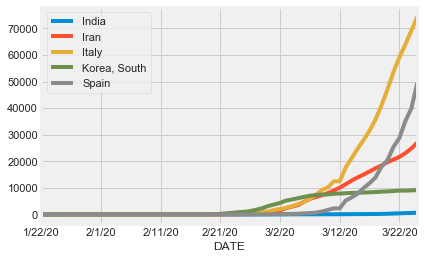

In [26]:
df_confirmed_All.plot();

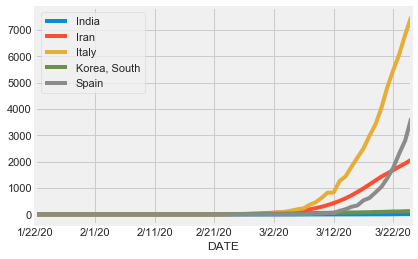

In [27]:
#df_recovered_All.plot();
df_deaths_plot_T.plot();

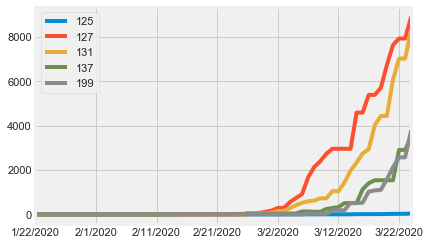

In [28]:
df_recovered_All.plot();
df_recovered1 = df_recovered_All.copy()

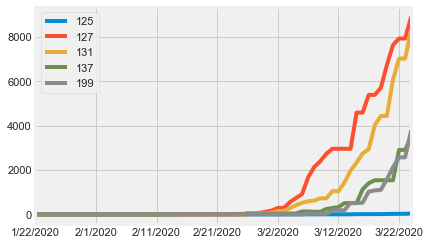

In [29]:
df_recovered1.fillna(0,inplace=True)
df_recovered1.plot();

##  Cases in India  vs Deaths 

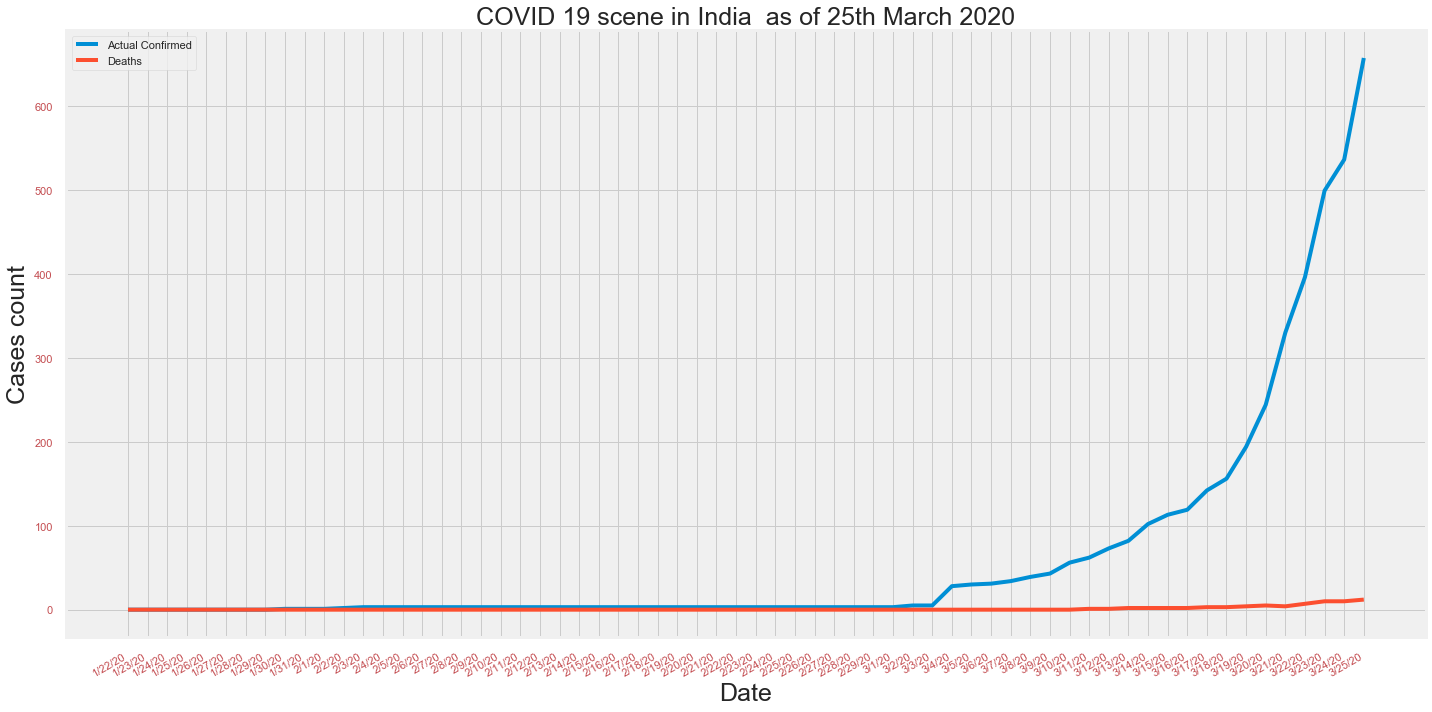

In [32]:
s1 = df_confirmed_All['India']
s2 = df_deaths_All['India']


fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(XDate, s1, label='Actual Confirmed')
ax.plot(XDate, s2, label = 'Deaths')
ax.legend()
ax.tick_params(direction='out', length=10, width=10, colors='r')
ax.set_xlabel('Date',fontsize=25)
ax.set_ylabel('Cases count',fontsize=25)
ax.set_title('COVID 19 scene in India  as of 25th March 2020',fontsize=25)
fig.autofmt_xdate()

ax.grid(True)
fig.tight_layout()

plt.show()

In [33]:
# Extract date DF for All countries 
df_confirmed_1 = df_confirmed_All.copy()
# Create date column 
df_confirmed_All['DATE'] = df_confirmed_All.index
df_confirmed_All.head()
# Create date DF 
DT_df = df_confirmed_All[['DATE']]
DT_df  = DT_df.set_index('DATE')


In [34]:
# Extract Series for All countries
s_India   = df_confirmed_All['India']
s_Iran    = df_confirmed_All['Iran']
s_Italy   = df_confirmed_All['Italy']
s_Korea   = df_confirmed_All['Korea, South']
s_Spain   = df_confirmed_All['Spain']

In [35]:
# Extract date DF   for All countries
#--------------------------------------
n = 50  # cutoff case count for fitting model 
#------------------
India_DT_df      = DT_df[s_India >n]
Iran_DT_df       = DT_df[s_Iran >n]
Italy_DT_df      = DT_df[s_Italy >n]
Korea_DT_df      = DT_df[s_Korea >n]
Spain_DT_df      = DT_df[s_Spain >n]


In [36]:
# Create a Date column 
India_DT_df['Date']      = India_DT_df.index
Iran_DT_df['Date']       = Iran_DT_df.index
Italy_DT_df['Date']      = Italy_DT_df.index
Korea_DT_df['Date']      = Korea_DT_df.index
Spain_DT_df['Date']      = Spain_DT_df.index 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [37]:
# Get Series of All date DFs
India_DT_s  = India_DT_df['Date']      
Iran_DT_s   = Iran_DT_df['Date']     
Italy_DT_s  = Italy_DT_df['Date']      
Korea_DT_s  = Korea_DT_df['Date']      
Spain_DT_s  = Spain_DT_df['Date']

In [55]:
# subset each series for numbers > 100
n = 50
#-------------------------------------------------
# India
s_India_GE100 = s_India[s_India > n] 
s_India_GE100 = pd.to_numeric(s_India_GE100, errors='coerce').fillna(0, downcast='infer')
#----------------------------------------------
# Iran
s_Iran_GE100 = s_Iran[s_Iran > n] 
s_Iran_GE100 = pd.to_numeric(s_Iran_GE100, errors='coerce').fillna(0, downcast='infer')
#-------------------------------------------------
# Italy
s_Italy_GE100 = s_Italy[s_Italy > n] 
s_Italy_GE100 = pd.to_numeric(s_Italy_GE100, errors='coerce').fillna(0, downcast='infer')
#-------------------------------------------------
# Korea
s_Korea_GE100 = s_Korea[s_Korea > n] 
s_Korea_GE100 = pd.to_numeric(s_Korea_GE100, errors='coerce').fillna(0, downcast='infer')
#--------------------------------------------------
# Spain
s_Spain_GE100 = s_Spain[s_Spain > n] 
s_Spain_GE100 = pd.to_numeric(s_Spain_GE100, errors='coerce').fillna(0, downcast='infer')



In [72]:
# Model India 
import numpy as np
#--------------------------------------
# Y data 
Y = s_India_GE100
# X data 
X = np.arange(1,len(Y)+1)
Xdate = India_DT_s
# Fit 3rd Degree polynomial capture coefficients 
Z = np.polyfit(X, Y, 3)
# Generate polynomial function with these coefficients 
P = np.poly1d(Z)
# Generate X data for forecast 
XP = np.arange(1,len(Y)+8)
# Generate forecast 
YP = P(XP)
# Fit Curve
Yfit = P(X)

import datetime
start = Xdate[0]
#start
end_dt = datetime.datetime.strptime(Xdate[len(Xdate)-1], "%m/%d/%y")

end_date = datetime.datetime.strptime(str(end_dt),'%Y-%m-%d %H:%M:%S').date()

end_forecast_dt= end_dt + datetime.timedelta(days=7)

end_forecast =  datetime.datetime.strptime(str(end_forecast_dt),'%Y-%m-%d %H:%M:%S').date()
end_forecast
#
mydates = pd.date_range(start, end_forecast).to_list()
mydates_df = pd.DataFrame(mydates,columns =['Date']) 
mydates_df  = mydates_df.set_index('Date')
mydates_df['Date'] = mydates_df.index
X_FC = mydates_df['Date']

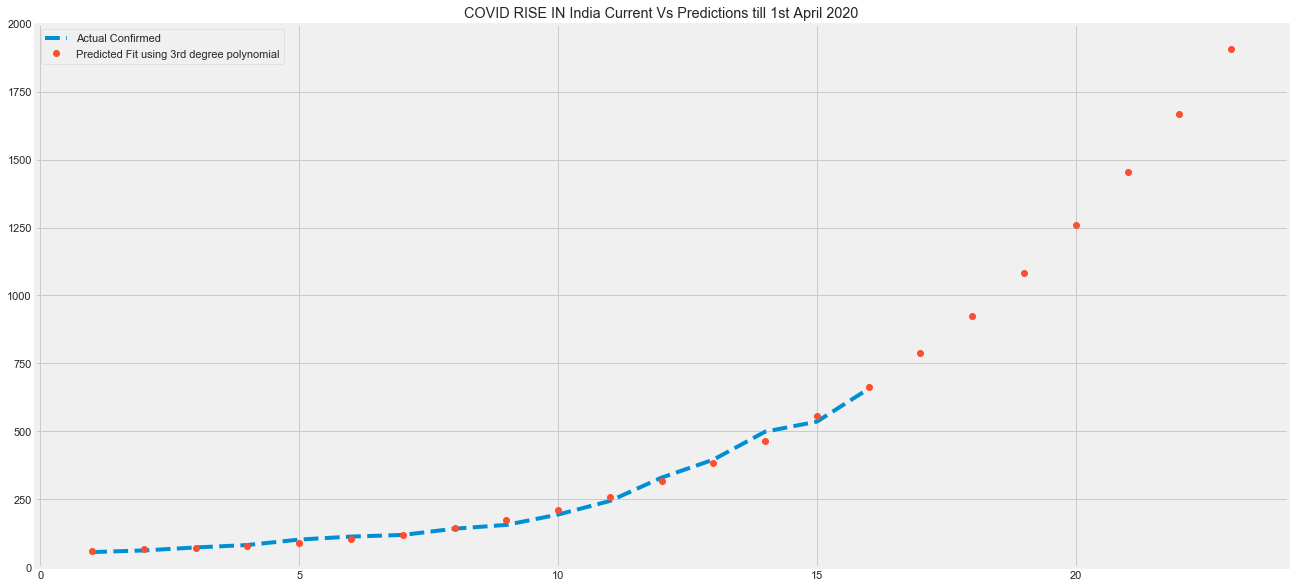

In [102]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(X, Y, '--',label='Actual Confirmed')
ax.plot(XP, YP, 'o',label='Predicted Fit using 3rd degree polynomial')
plt.title('COVID RISE IN India Current Vs Predictions till 1st April 2020')
ax.legend()
ax.set_ylim(0,2000)
ax.grid(True)
plt.show()

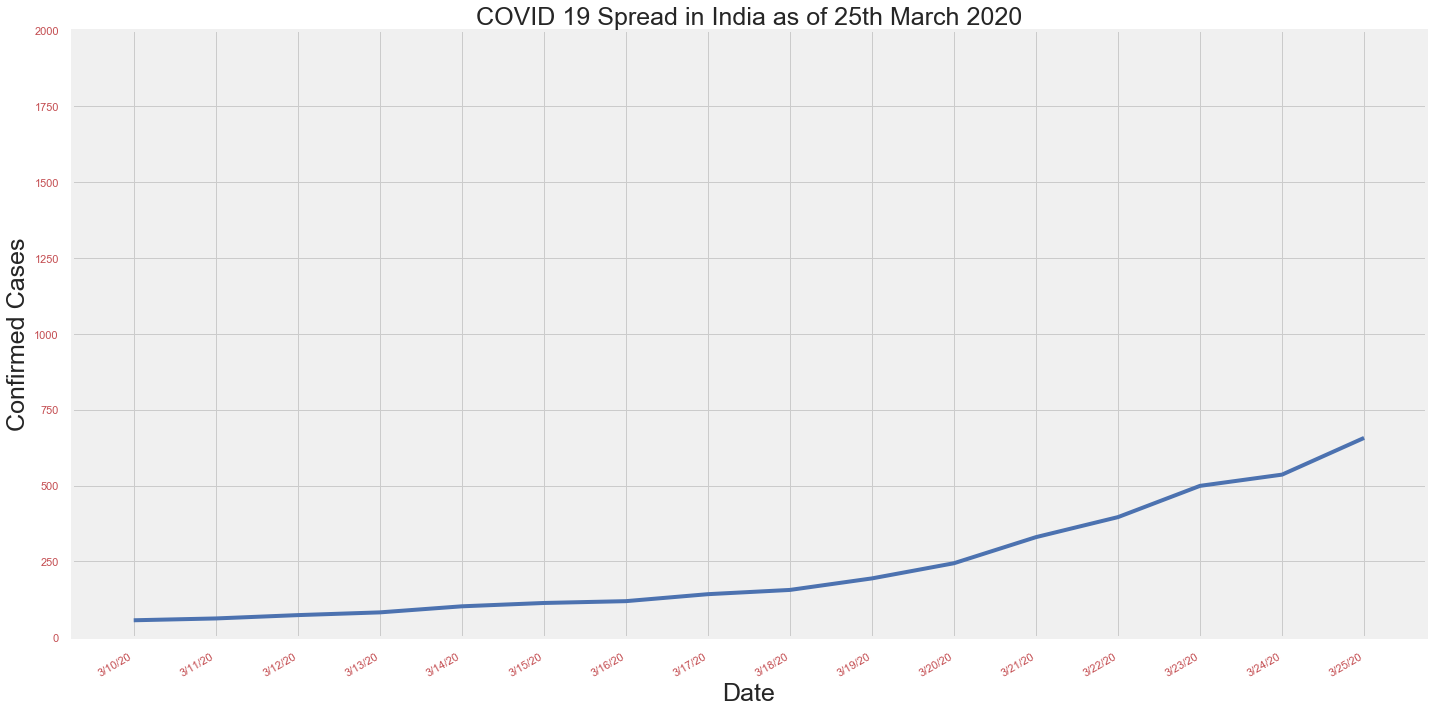

In [80]:
# Define new figure 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Xdate,Y,'b-')
ax.tick_params(direction='out', length=10, width=10, colors='r')
ax.set_xlabel('Date',fontsize=25)
ax.set_ylabel('Confirmed Cases',fontsize=25)
ax.set_title('COVID 19 Spread in India as of 25th March 2020',fontsize=25)
ax.set_ylim(0,2000)
fig.autofmt_xdate()

ax.grid(True)
fig.tight_layout()

plt.show()

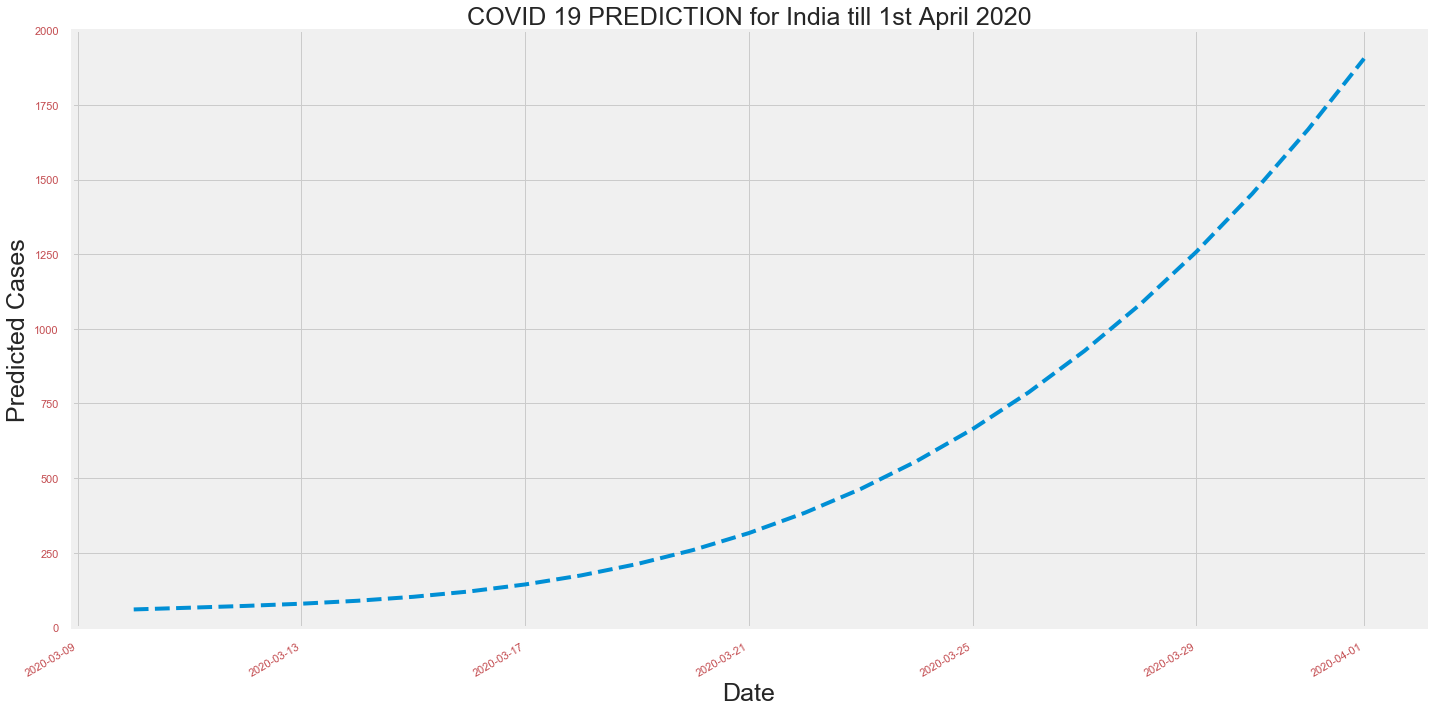

In [79]:
# Define new figure 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(X_FC,YP,'--')
ax.tick_params(direction='out', length=10, width=10, colors='r')
ax.set_xlabel('Date',fontsize=25)
ax.set_ylabel('Predicted Cases',fontsize=25)
ax.set_ylim(0,2000)
ax.set_title('COVID 19 PREDICTION for India till 1st April 2020',fontsize=25)
fig.autofmt_xdate()

ax.grid(True)
fig.tight_layout()

plt.show()

In [130]:
# Create a dataframe from Predicted data 
dict1 = {'Date':X_FC,'Predicted_Cases':YP}
pred_df = pd.DataFrame.from_dict(dict1)
pred_df = pred_df[['Predicted_Cases']]
pred_df.Predicted_Cases = pred_df.Predicted_Cases.astype(int)
pred_df1 = pred_df.tail(n=8)
pred_df1.style.background_gradient()




,Predicted_Cases
Date,
2020-03-25 00:00:00,664
2020-03-26 00:00:00,787
2020-03-27 00:00:00,926
2020-03-28 00:00:00,1082
2020-03-29 00:00:00,1257
2020-03-30 00:00:00,1452
2020-03-31 00:00:00,1668
2020-04-01 00:00:00,1905


In [138]:
# Read file for DBD India cases 
India_dbd_df = pd.read_csv('India_cases_March_27.csv')
India_dbd_df['Total_Actuals']= India_dbd_df['Confirmed_Foreign'] +India_dbd_df['Confirmed_Indian']
cols_to_keep = ['Date','Total_Actuals']
India_Act_df = India_dbd_df[cols_to_keep]

India_Act_df1 = India_Act_df.tail(n=3)
India_Act_df1.set_index('Date',inplace=True)
India_Act_df1.style.background_gradient()

,Total_Actuals
Date,
2020-03-25,606
2020-03-26,694
2020-03-27,724
